Credits - https://github.com/bansalkanav/Machine_Learning_and_Deep_Learning

# Multiple Linear Regression

We will see how to do Multiple Linear Regression using the following approaches:

1. Build a MLR Model using `sklearn`
    - Load the data
    - Understanding the data (EDA)
    - Data Preparation (Train Test Split)
    - Use `sklearn` in order to train the model
    - Resdual Analysis on Train Data
    - Prediction on Test Data
    - Evaluation - (RMSE, R_squared)
2. Feature Importance using `Ensembles`
3. Automatic Feature Selection using `RFE`
4. Dimensionality Reduction with `PCA`

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/housing_data.csv")

df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Understanding and Viz

Number of Instances: 20640
Number of Attributes: 8 numeric, predictive attributes and the target
Attribute Information:
- MedInc median income in block group
- HouseAge median house age in block group
- AveRooms average number of rooms per household
- AveBedrms average number of bedrooms per household
- Population block group population
- AveOccup average number of household members
- Latitude block group latitude
- Longitude block group longitude

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [4]:
df.corr()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


<Axes: >

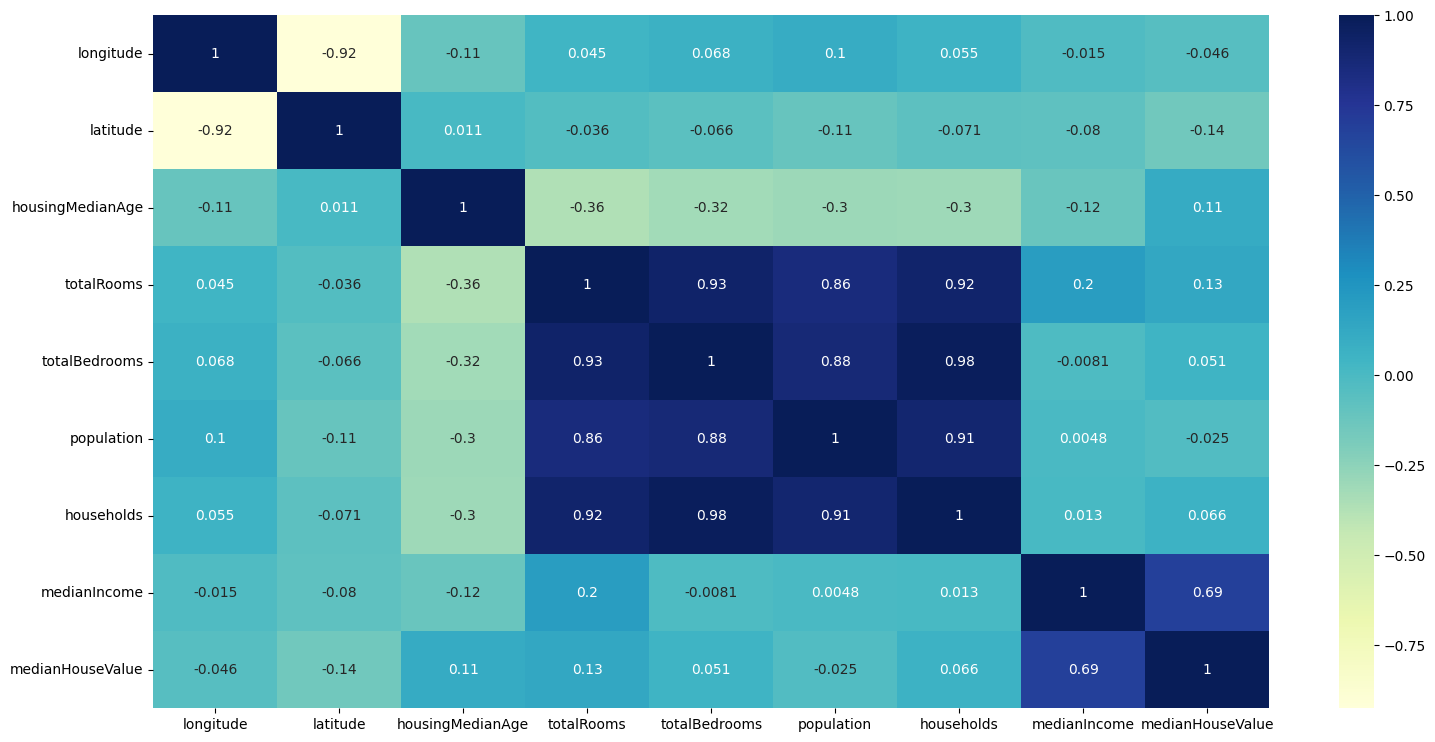

In [5]:
plt.figure(figsize=(18, 9))

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


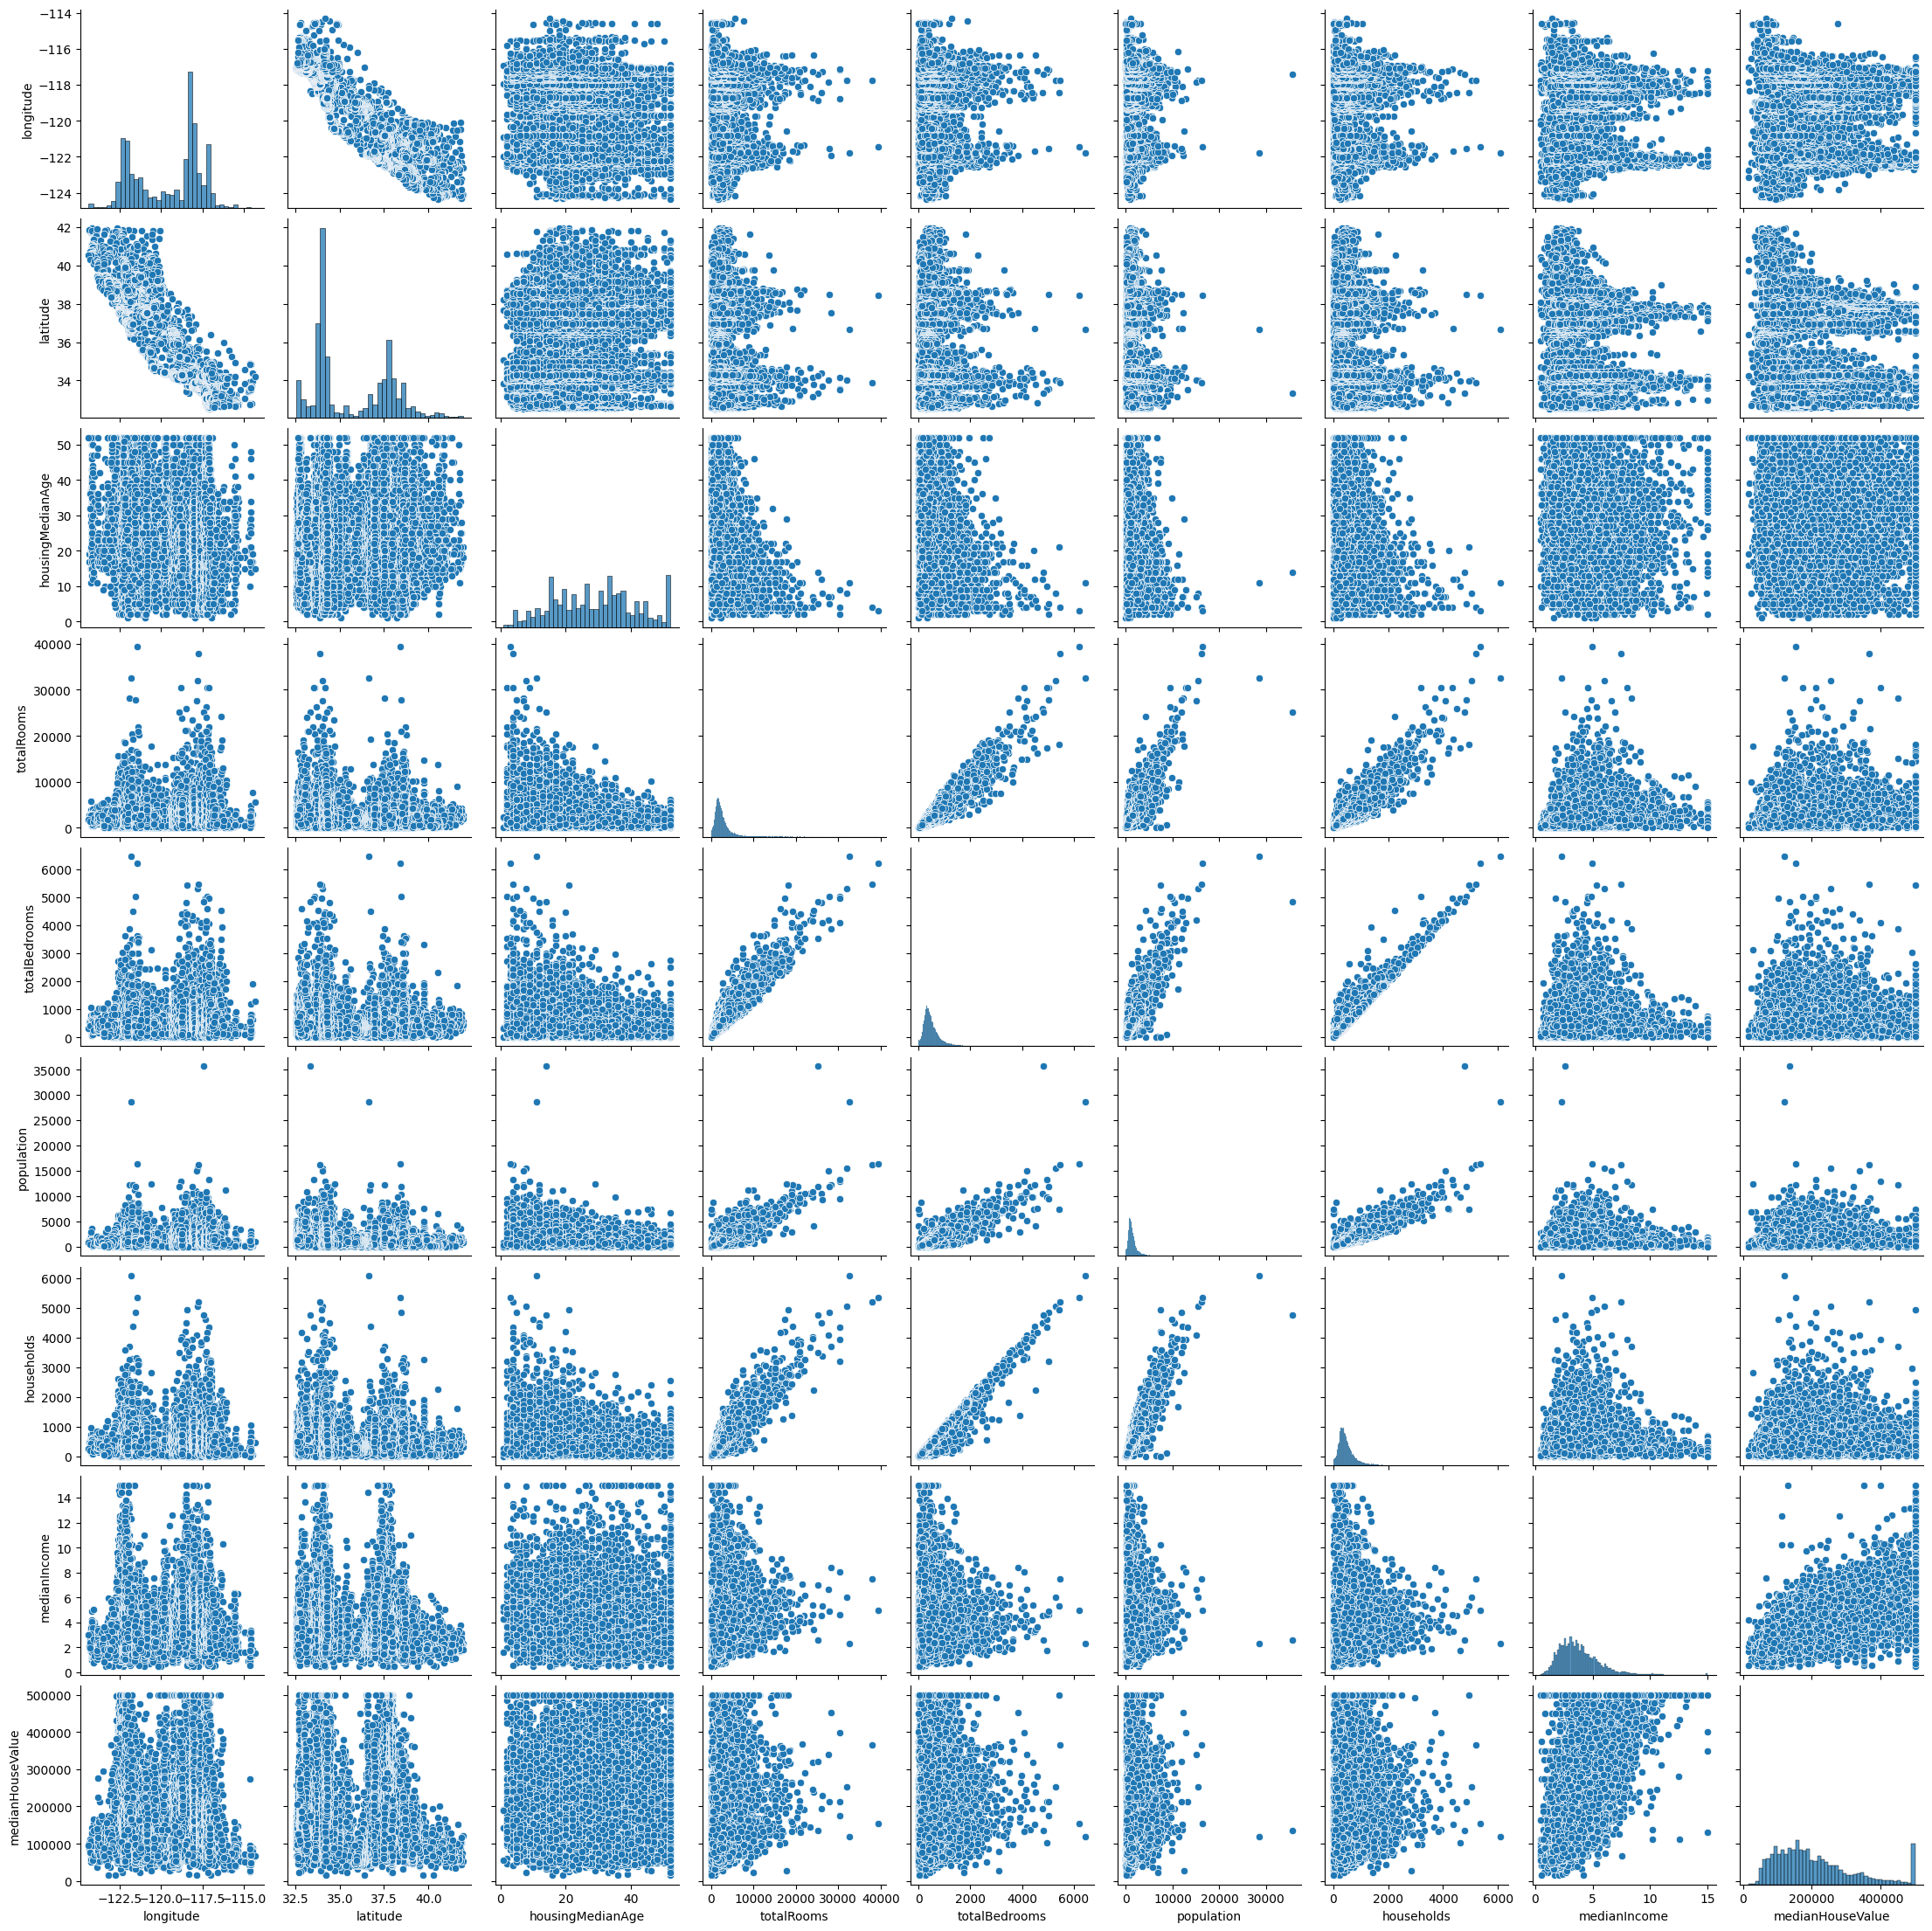

In [6]:
sns.pairplot(df)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',
       'medianHouseValue'],
      dtype='object')

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


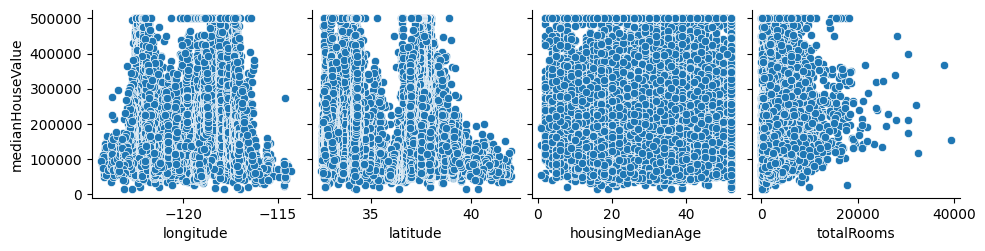

In [8]:
sns.pairplot(data = df,
            x_vars = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms'],
            y_vars = 'medianHouseValue')

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


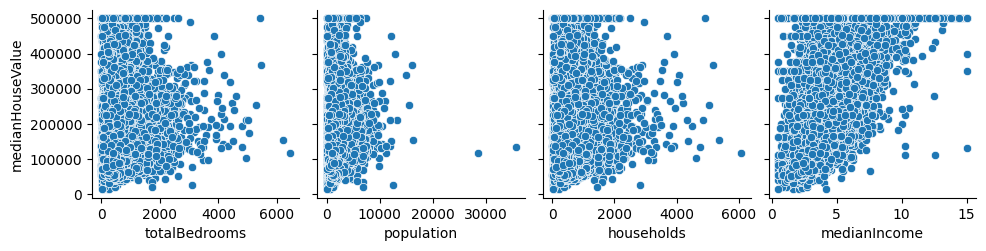

In [9]:
sns.pairplot(data = df,
            x_vars = ['totalBedrooms', 'population', 'households', 'medianIncome'],
            y_vars = 'medianHouseValue')

### Data Preparation

In [10]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['medianHouseValue'])

y = df['medianHouseValue']

In [11]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


# **1. Building the MLR Model using `sklearn`**

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

### Residual Analysis on Training Data

In [13]:
y_train_pred = regressor.predict(X_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


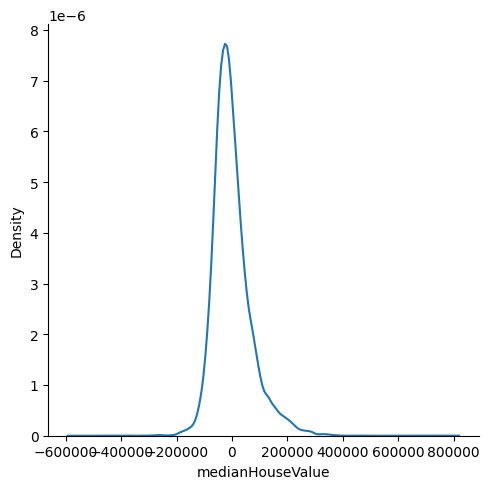

In [14]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

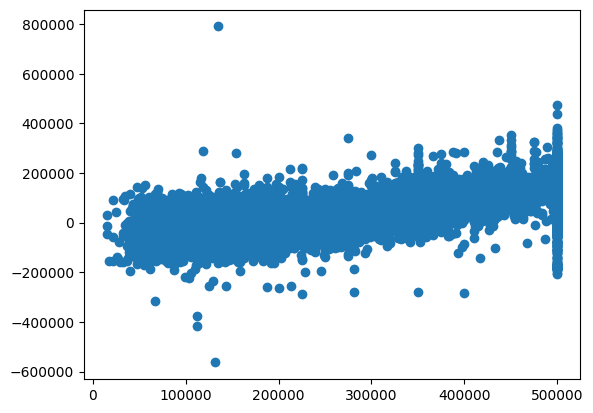

In [15]:
plt.scatter(y_train, residual)

plt.show()

<Axes: xlabel='medianHouseValue', ylabel='Count'>

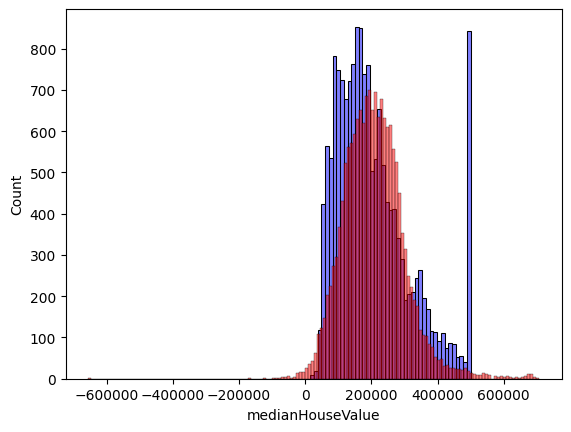

In [16]:
import seaborn as sns

sns.histplot(y_train, color='blue', alpha=0.5)

sns.histplot(y_train_pred, color='red', alpha=0.5)

### Making Prediction

In [17]:
y_test_pred = regressor.predict(X_test)

In [18]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
14740,136900.0,210368.021331
10101,241300.0,278540.986476
20566,200700.0,189607.985817
2670,72500.0,91429.920199
15709,460000.0,294857.416103
...,...,...
6655,169500.0,161933.852113
3505,204600.0,239495.948899
1919,128600.0,79802.313283
1450,259500.0,279899.949551


<Axes: xlabel='medianHouseValue', ylabel='Count'>

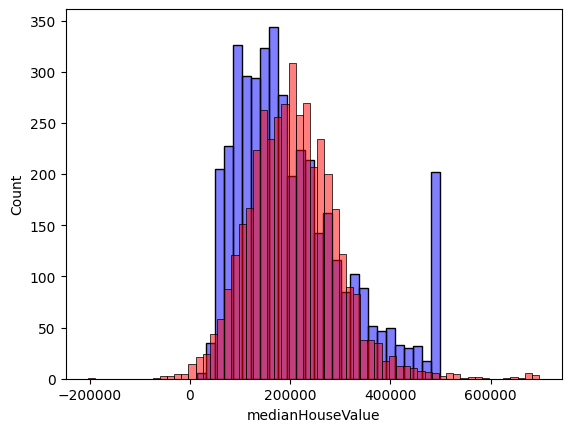

In [19]:
import seaborn as sns

sns.histplot(y_test, color='blue', alpha=0.5)

sns.histplot(y_test_pred, color='red', alpha=0.5)

### Evaluation

In [20]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  50863.49784071704


In [21]:
print(metrics.r2_score(y_test, y_test_pred))

0.6277645980446463


<Axes: xlabel='medianHouseValue'>

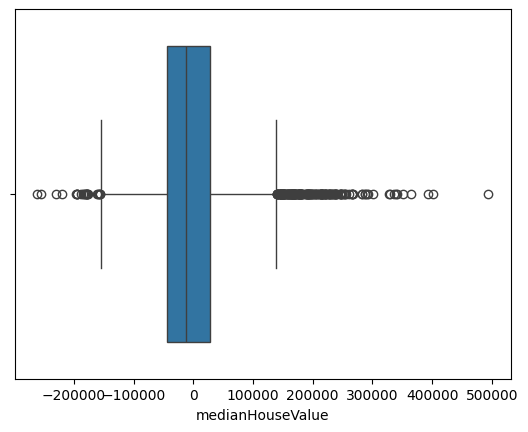

In [22]:
residual_test = y_test - y_test_pred

sns.boxplot(x = residual_test)

# **2. Feature Importance using `Ensemble`**

In [23]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
model_rf.feature_importances_

array([0.15875603, 0.15127354, 0.06557821, 0.0246335 , 0.0247901 ,
       0.03599503, 0.01936409, 0.51960948])

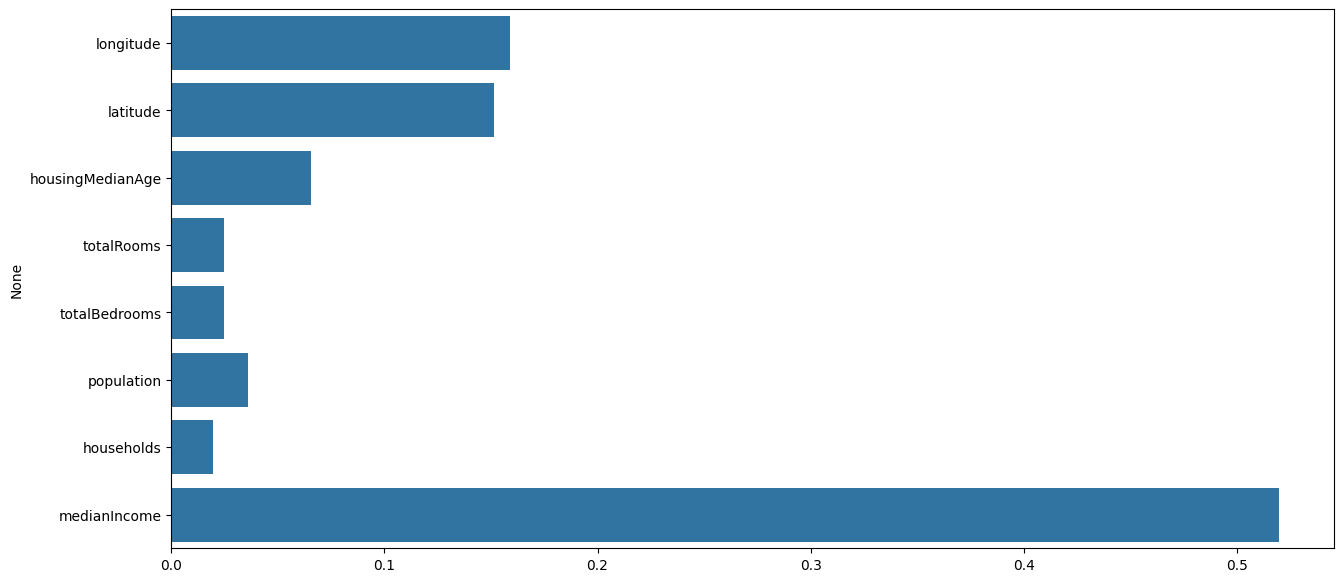

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns, )
plt.show();

# **3. Automatic Feature Selection (RFE - `Recursive Feature Elimination`)**

In [26]:
from sklearn.linear_model import LinearRegression

regressor_temp = LinearRegression()

In [27]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, n_features_to_select=5)

rfe = rfe.fit(X_train, y_train)

In [28]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,longitude,True,1
1,latitude,True,1
2,housingMedianAge,True,1
3,totalRooms,False,4
4,totalBedrooms,True,1
5,population,False,3
6,households,False,2
7,medianIncome,True,1


In [29]:
imp_col = X_train.columns[rfe.support_]

imp_col

Index(['longitude', 'latitude', 'housingMedianAge', 'totalBedrooms',
       'medianIncome'],
      dtype='object')

In [30]:
X_train_rfe = X_train[imp_col]

X_train_rfe.head()

,longitude,latitude,housingMedianAge,totalBedrooms,medianIncome
12069,-117.55,33.83,6.0,76.0,4.2386
15925,-122.44,37.73,52.0,492.0,4.3898
11162,-118.00,33.83,26.0,385.0,3.9333
4904,-118.26,34.01,38.0,208.0,1.4653
4683,-118.36,34.08,52.0,601.0,3.1765


In [31]:
from sklearn.linear_model import LinearRegression

regressor_rfe = LinearRegression()

regressor_rfe.fit(X_train_rfe, y_train)

LinearRegression()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


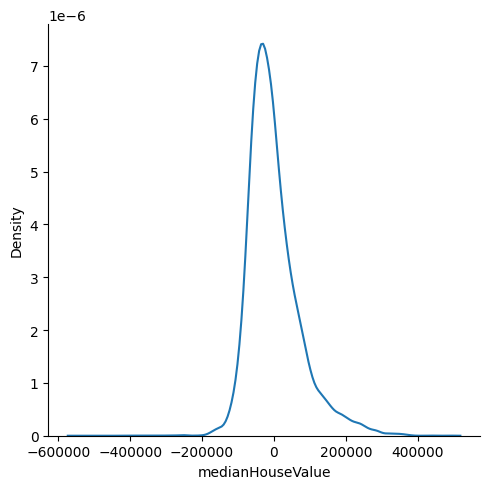

In [32]:
y_train_pred_rfe = regressor_rfe.predict(X_train_rfe)

residual = y_train - y_train_pred_rfe

sns.displot(residual, kind='kde')

In [33]:
X_test_rfe = X_test[imp_col]

y_test_pred_rfe = regressor_rfe.predict(X_test_rfe)

In [34]:
temp_df_rfe = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rfe})
temp_df_rfe

,Actual,Predicted
14740,136900.0,225683.913750
10101,241300.0,284155.362837
20566,200700.0,196832.659506
2670,72500.0,84181.415299
15709,460000.0,275234.556993
...,...,...
6655,169500.0,163626.080018
3505,204600.0,239064.087068
1919,128600.0,75490.961451
1450,259500.0,281982.110072


In [35]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_rfe))

Mean Absolute Error:  54090.36071286267


In [36]:
print(metrics.r2_score(y_test, y_test_pred_rfe))

0.5882313933726799


<Axes: xlabel='medianHouseValue'>

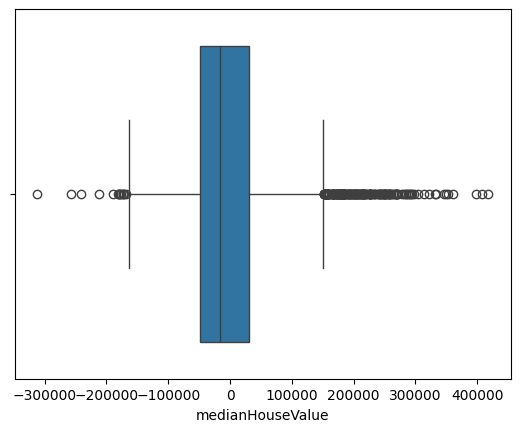

In [37]:
residual_test_rfe = y_test - y_test_pred_rfe

sns.boxplot(x = residual_test_rfe)

### Comparison of the Models

In [38]:
res_df = pd.DataFrame({'residual_test': residual_test, 'residual_test_rfe': residual_test_rfe})

res_df.head()

,residual_test,residual_test_rfe
14740,-73468.021331,-88783.913750
10101,-37240.986476,-42855.362837
20566,11092.014183,3867.340494
2670,-18929.920199,-11681.415299
15709,165142.583897,184765.443007


<Axes: >

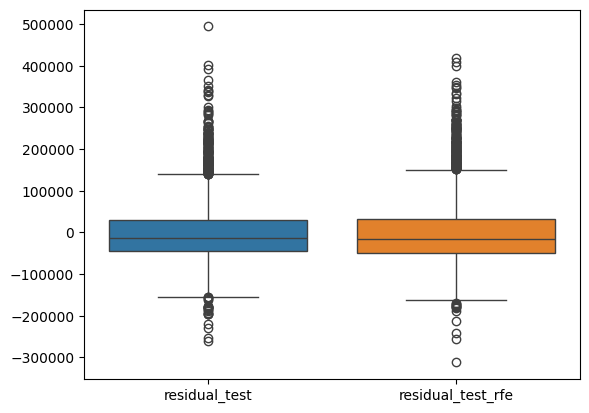

In [39]:
sns.boxplot(data = res_df)

## **4. Principal Component Analysis**

<Axes: >

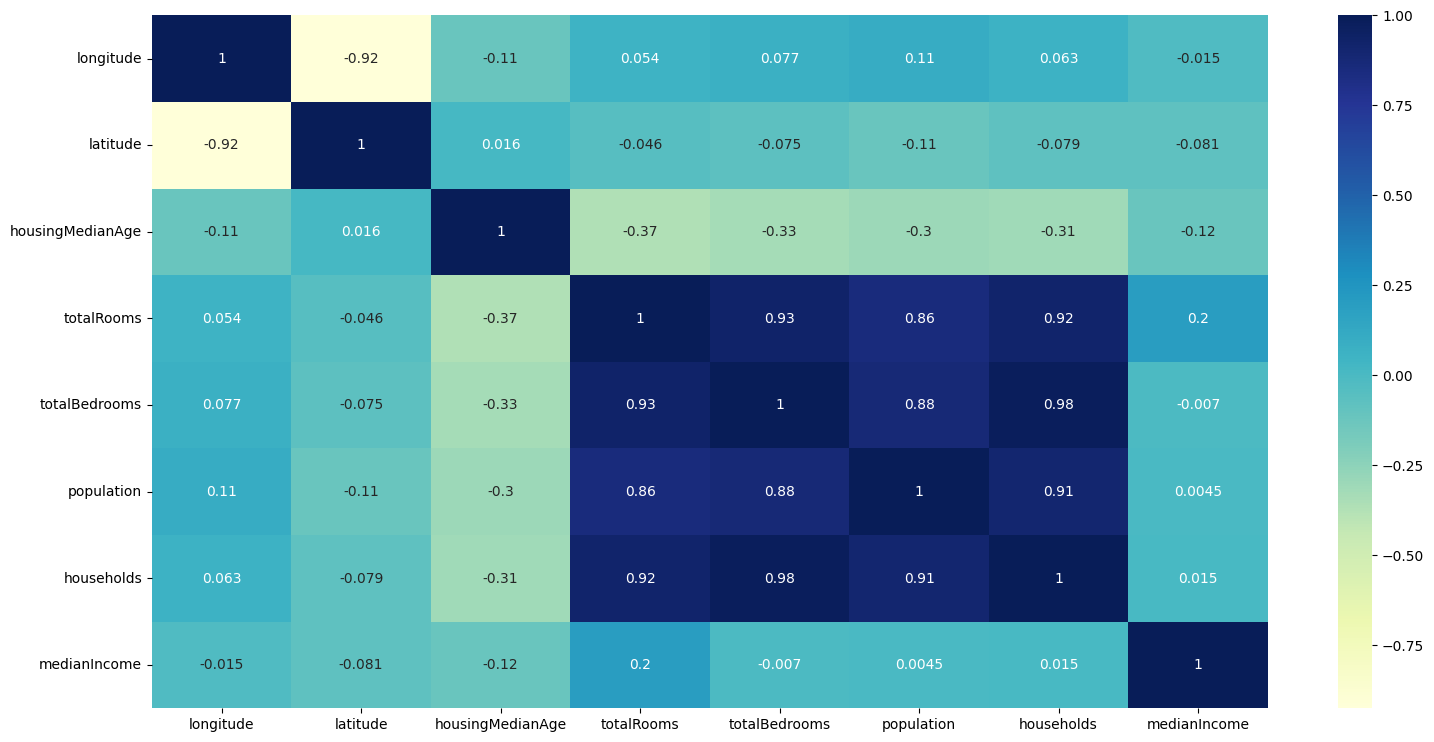

In [40]:
plt.figure(figsize=(18, 9))

sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

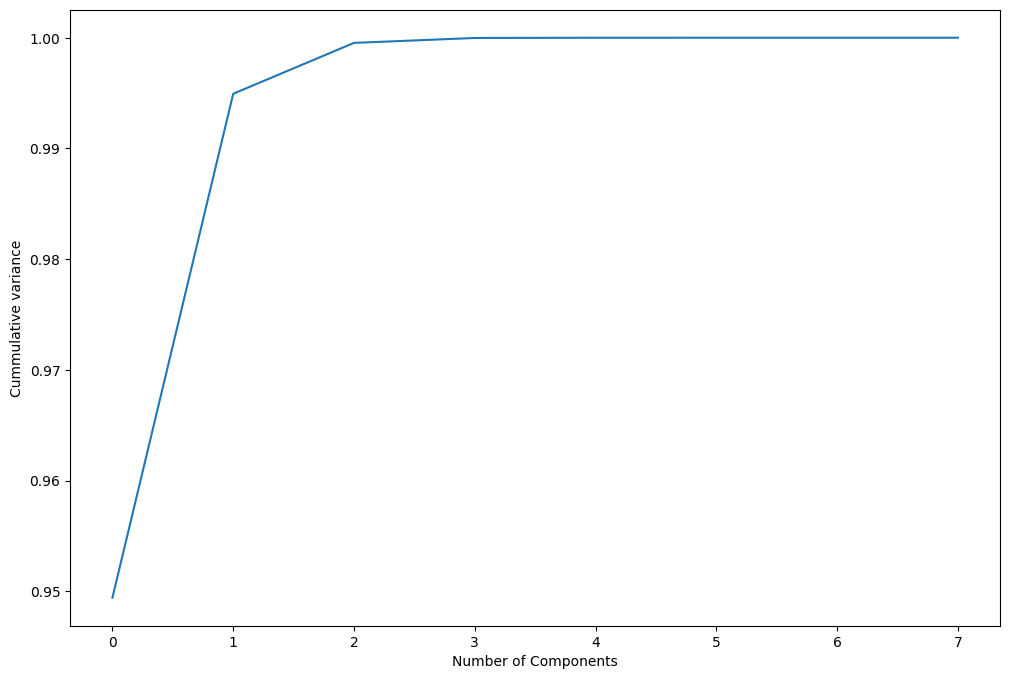

In [42]:
plt.figure(figsize = (12, 8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94943303, 0.99493882, 0.99953265, 0.99997705, 0.99999833,
       0.99999959, 0.99999996, 1.        ])

In [44]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 3, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [45]:
X_train_pca.shape

(16512, 3)

<Axes: >

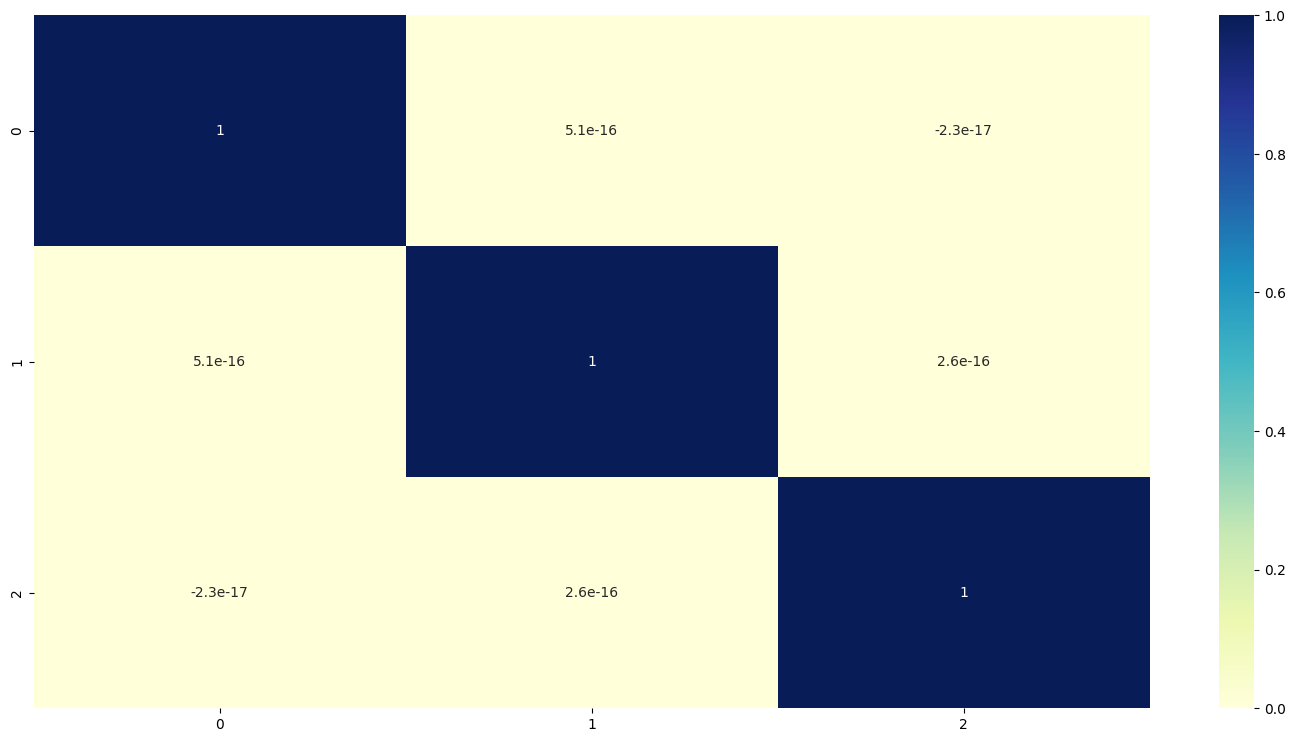

In [46]:
corrmat = np.corrcoef(X_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu", annot=True)

In [47]:
X_test_pca = pca_final.transform(X_test)

In [48]:
# Building the final model with 3 features

from sklearn.linear_model import LinearRegression

regressor_pca = LinearRegression()

regressor_pca.fit(X_train_pca, y_train)

LinearRegression()

In [49]:
# Prediction

y_test_pred_pca = regressor_pca.predict(X_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})

temp_df.head()

,Actual,Predicted
14740,136900.0,189051.083220
10101,241300.0,218399.210209
20566,200700.0,219676.715134
2670,72500.0,202914.553499
15709,460000.0,212999.938522


In [50]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_pca))

Mean Absolute Error:  85649.09403013298


<Axes: xlabel='medianHouseValue'>

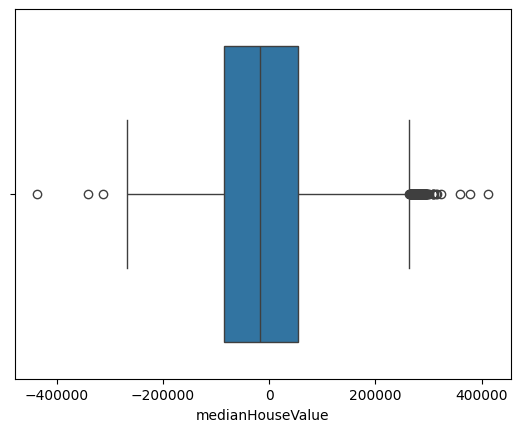

In [51]:
residual_test_pca = y_test - y_test_pred_pca

sns.boxplot(x = residual_test_pca)

In [52]:
res_df.head()

,residual_test,residual_test_rfe
14740,-73468.021331,-88783.913750
10101,-37240.986476,-42855.362837
20566,11092.014183,3867.340494
2670,-18929.920199,-11681.415299
15709,165142.583897,184765.443007


In [53]:
res_df['residual_test_pca'] = residual_test_pca

res_df.head()

,residual_test,residual_test_rfe,residual_test_pca
14740,-73468.021331,-88783.913750,-52151.083220
10101,-37240.986476,-42855.362837,22900.789791
20566,11092.014183,3867.340494,-18976.715134
2670,-18929.920199,-11681.415299,-130414.553499
15709,165142.583897,184765.443007,247000.061478


<Axes: >

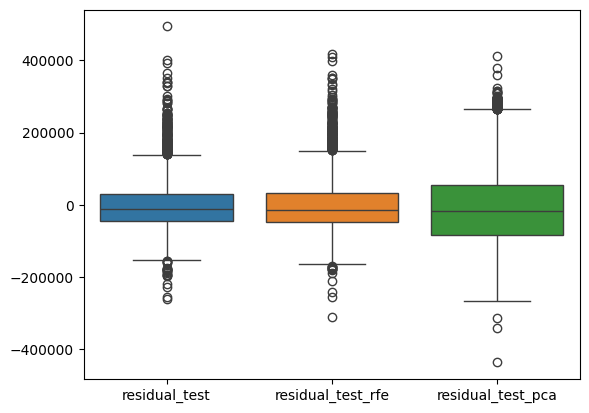

In [54]:
sns.boxplot(data = res_df)